In [1]:
import torch
import torch.nn as nn
import numpy as np
from torch.optim import optimizer
from sklearn import datasets
import matplotlib.pyplot as plt
from tqdm import tqdm
from torch.nn.functional import mse_loss
from torchmetrics.functional import r2_score
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
house_dataset = fetch_california_housing()

df = pd.DataFrame(
    house_dataset.data,
    columns=house_dataset.feature_names
)
df.loc[:,"Price"] = house_dataset.target

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df.loc[:,:] = scaler.fit_transform(df)

col_feature = house_dataset.feature_names
col_target = ["Price"]

y = torch.Tensor(df[col_target].to_numpy())
x = torch.Tensor(df[col_feature].to_numpy())

feature_train, feature_test, train_target, test_target = train_test_split(x, y, test_size=0.2)

n_samples, n_features = x.shape

# 1) model
class LinearRegression(nn.Module):
    
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        
        # define layers
        self.linear =  nn.Sequential(
                nn.Linear(input_dim, 300),
                nn.Tanh(),
                nn.Linear(300, 128),
                nn.Tanh(),
                nn.Linear(128, output_dim),
            )
        
    def forward(self, x):
    
        return self.linear(x)

model = LinearRegression(n_features, 1)










In [6]:
model.linear.parameters()

<generator object Module.parameters at 0x7feaf3288d60>

In [ ]:
# 2) loss and optimizer
learning_rate = 0.001
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [15]:
feature_train

tensor([[-2.3791e-01, -9.2485e-01,  1.8690e+00,  ..., -8.8901e-02,
          1.5816e+00, -1.5874e+00],
        [ 6.3467e-01, -3.6864e-01,  1.0537e-02,  ..., -7.2468e-03,
         -8.4829e-01,  8.1344e-01],
        [ 3.9755e+00, -6.0702e-01,  6.9107e-01,  ..., -2.2362e-02,
         -7.3592e-01,  5.1396e-01],
        ...,
        [ 8.7843e-01, -1.1632e+00,  3.3450e-01,  ..., -2.7074e-02,
         -1.0168e+00,  1.1129e+00],
        [-4.3119e-01, -6.0702e-01, -4.0641e-02,  ..., -1.1610e-03,
          7.8568e-01, -4.3439e-01],
        [-6.7606e-01,  1.1411e+00, -3.2529e-01,  ...,  2.0181e-02,
          1.0947e+00, -1.3877e+00]])

In [19]:
# 3) training loop
epochs = 2000
for epoch in range(epochs):
    model.train()
    # forward pass and loss
    y_predicted = model(feature_train)
    loss = criterion(y_predicted, train_target)
    r2 = r2_score(y_predicted, train_target)
    # backward pass
    loss.backward()
    # update
    optimizer.step()
    
    # init optimizer
    optimizer.zero_grad()
    print(f'epoch: {epoch+1}, loss = {loss.item(): .4f}, R2 = {r2}')
    
    model.eval()
    y_predicted = model(feature_train)
    loss = criterion(y_predicted, train_target)
    r2 = r2_score(y_predicted, train_target)
    
    print(f'test: loss = {loss.item(): .4f}, R2 = {r2}')

epoch: 1, loss =  0.0756, R2 = 0.9243568181991577
test: loss =  0.0757, R2 = 0.9243043661117554
epoch: 2, loss =  0.0757, R2 = 0.9243043661117554
test: loss =  0.0757, R2 = 0.9242651462554932
epoch: 3, loss =  0.0757, R2 = 0.9242651462554932
test: loss =  0.0757, R2 = 0.9242469668388367
epoch: 4, loss =  0.0757, R2 = 0.9242469668388367
test: loss =  0.0757, R2 = 0.9242547154426575
epoch: 5, loss =  0.0757, R2 = 0.9242547154426575
test: loss =  0.0757, R2 = 0.924291729927063
epoch: 6, loss =  0.0757, R2 = 0.924291729927063
test: loss =  0.0756, R2 = 0.9243543744087219
epoch: 7, loss =  0.0756, R2 = 0.9243543744087219
test: loss =  0.0755, R2 = 0.9244295358657837
epoch: 8, loss =  0.0755, R2 = 0.9244295358657837
test: loss =  0.0755, R2 = 0.9244977831840515
epoch: 9, loss =  0.0755, R2 = 0.9244977831840515
test: loss =  0.0754, R2 = 0.9245430827140808
epoch: 10, loss =  0.0754, R2 = 0.9245430827140808
test: loss =  0.0754, R2 = 0.9245599508285522
epoch: 11, loss =  0.0754, R2 = 0.9245599

In [13]:
model.train()
out_loss, num, tot_loss = 0, 0, []
y_out, y_tar = torch.Tensor([]),torch.Tensor([])
data_loader = tqdm(data_loader)
for step, (x, y) in enumerate(data_loader):

    x, y = x.cuda(), y.cuda()
    losses = model(x, y)
    tot_loss.append(losses)
        
    pred = model.inference(x)
    y_out = torch.cat((y_out, pred.cpu()), 0)
    y_tar = torch.cat((y_tar, y.cpu()), 0)
    #cor += (pred.argmax(-1) == y).sum().item()
    out_loss += mse_loss(pred, y, reduction='sum')
    num += x.size(0)
    
    data_loader.set_description(f'Train {epoch} | out_loss {torch.sqrt(out_loss/num)}')

train_out = mse_loss(y_out, y_tar).item()
train_r2 = r2_score(y_out, y_tar).item()
train_loss = numpy.sum(tot_loss, axis=0)

print(f'Train Epoch{epoch} out_loss {train_out}, R2 {train_r2}')

NameError: name 'tqdm' is not defined

In [16]:
col_target = data.columns[:6]
col_feature1 = data.columns[6:33].to_list() # 27 cols
col_feature2 = data.columns[33:43].to_list() # 10 cols
col_feature3 = data.columns[43:103].to_list() # 60 cols
col_feature4 = data.columns[103:].to_list() # 28 cols
y = data[col_target]
x = data[col_feature1 + col_feature2 + col_feature3 + col_feature4]
x = x.fillna(0)
x.shape

(635, 125)

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_kddcup99
from sklearn.preprocessing import LabelEncoder, StandardScaler
dataset = fetch_kddcup99()

df = pd.DataFrame(
    dataset.data,
    columns=dataset.feature_names
)
df.loc[:,"label"] = dataset.target

In [14]:
col_sparse = ['protocol_type','service','flag']
col_dense = ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
    'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
    'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
    'num_access_files', 'num_outbound_cmds', 'is_host_login',
    'is_guest_login', 'count', 'srv_count', 'serror_rate',
    'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
    'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
    'dst_host_srv_count', 'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
    'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate']
label = ['label']

In [15]:
df[col_sparse] = df[col_sparse].fillna('-1', )
df[col_dense] = df[col_dense].fillna(0,)

for feat in col_sparse:
    lbe = LabelEncoder()
    df.loc[:,feat] = lbe.fit_transform(df[feat])
    #print(df[feat].value_counts())
lbe = LabelEncoder()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,1,22,9,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,b'normal.'
1,0,1,22,9,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,b'normal.'
2,0,1,22,9,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,b'normal.'
3,0,1,22,9,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,b'normal.'
4,0,1,22,9,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,b'normal.'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,1,22,9,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,b'normal.'
494017,0,1,22,9,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,b'normal.'
494018,0,1,22,9,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,b'normal.'
494019,0,1,22,9,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,b'normal.'


In [20]:
df['label'].value_counts(sort=True)
for group in df.groupby(label):
    print(group)

(b'back.',         duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
39723          0              1       22     9      54540       8314     0   
39724          0              1       22     9      54540       8314     0   
39725          0              1       22     9      54540       8314     0   
39726          0              1       22     9      54540       8314     0   
39727          0              1       22     9      54540       8314     0   
...          ...            ...      ...   ...        ...        ...   ...   
480558         0              1       22     9      54540       8314     0   
480559         0              1       22     9      54540       8314     0   
480560         0              1       22     9      54540       8314     0   
480561         0              1       22     9      54540       8314     0   
480562         0              1       22     9      54540       8314     0   

        wrong_fragment  urgent  hot  ...  dst_host_s

In [9]:
df.loc[:,label] = lbe.fit_transform(df[label])


NameError: name 'x' is not defined

In [10]:
scaler = StandardScaler()
df[col_dense] = scaler.fit_transform(df[col_dense])



label    22
dtype: int64

In [12]:
y = df[label]
x = df[col_dense + col_sparse].astype('float64')
x.shape
y.max()

import torch
import torch.nn.functional as F


x = torch.tensor(x.to_numpy()).float()
y = torch.tensor(y.to_numpy())

class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer
    def forward(self, x):
            x = F.relu(self.hidden(x))      # activation function for hidden layer
            x = self.predict(x)             # linear output
            return x
net = Net(n_feature=41, n_hidden=128, n_output=23)     # define the network
print(net)  # net architecture
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
loss_func = torch.nn.CrossEntropyLoss()

for t in range(200):
    out = net(x)
    loss = loss_func(out, y.view(-1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if t % 2 == 0:
        _, prediction = torch.max(F.softmax(out), 1)

        #print(prediction.view(-1) == y.view(-1))
        #print(y.view(-1).shape)
        accuracy = sum(prediction.view(-1) == y.view(-1))/x.shape[0]
        print(accuracy)


Net(
  (hidden): Linear(in_features=41, out_features=128, bias=True)
  (predict): Linear(in_features=128, out_features=23, bias=True)
)


/tmp/ipykernel_149567/89872836.py:35: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  _, prediction = torch.max(F.softmax(out), 1)


tensor(0.2150)
tensor(0.2156)
tensor(0.2166)
tensor(0.2181)
tensor(0.7887)
tensor(0.7896)
tensor(0.7907)
tensor(0.7920)
tensor(0.7969)
tensor(0.8018)
tensor(0.8136)
tensor(0.8350)
tensor(0.8717)
tensor(0.9050)
tensor(0.9246)
tensor(0.9552)
tensor(0.9569)
tensor(0.9594)
tensor(0.9621)
tensor(0.9645)
tensor(0.9795)
tensor(0.9801)
tensor(0.9805)
tensor(0.9807)
tensor(0.9808)
tensor(0.9809)
tensor(0.9815)
tensor(0.9817)
tensor(0.9820)
tensor(0.9831)
tensor(0.9845)
tensor(0.9855)
tensor(0.9855)
tensor(0.9856)
tensor(0.9856)
tensor(0.9858)
tensor(0.9877)
tensor(0.9884)
tensor(0.9885)
tensor(0.9887)
tensor(0.9888)
tensor(0.9888)
tensor(0.9889)
tensor(0.9889)
tensor(0.9889)
tensor(0.9889)
tensor(0.9893)
tensor(0.9895)
tensor(0.9904)
tensor(0.9905)
tensor(0.9906)
tensor(0.9906)
tensor(0.9907)
tensor(0.9907)
tensor(0.9908)
tensor(0.9909)
tensor(0.9910)
tensor(0.9910)
tensor(0.9911)
tensor(0.9911)
tensor(0.9911)
tensor(0.9912)
tensor(0.9913)
tensor(0.9913)
tensor(0.9915)
tensor(0.9915)
tensor(0.9

duration 
 0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
494016    0.0
494017    0.0
494018    0.0
494019    0.0
494020    0.0
Name: duration, Length: 494021, dtype: float64


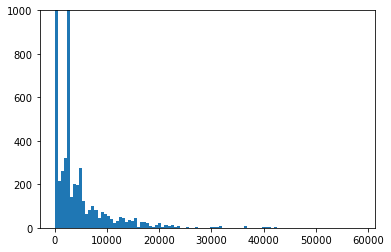

src_bytes 
 0         181.0
1         239.0
2         235.0
3         219.0
4         217.0
          ...  
494016    310.0
494017    282.0
494018    203.0
494019    291.0
494020    219.0
Name: src_bytes, Length: 494021, dtype: float64


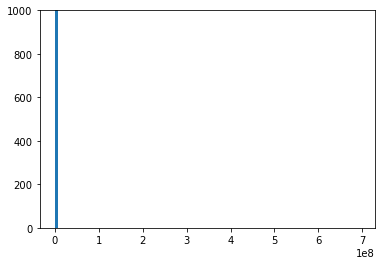

dst_bytes 
 0         5450.0
1          486.0
2         1337.0
3         1337.0
4         2032.0
           ...  
494016    1881.0
494017    2286.0
494018    1200.0
494019    1200.0
494020    1234.0
Name: dst_bytes, Length: 494021, dtype: float64


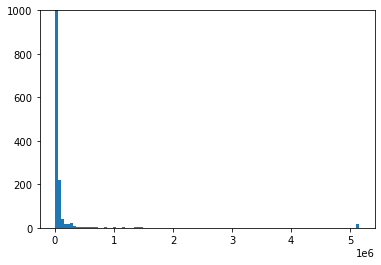

land 
 0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
494016    0.0
494017    0.0
494018    0.0
494019    0.0
494020    0.0
Name: land, Length: 494021, dtype: float64


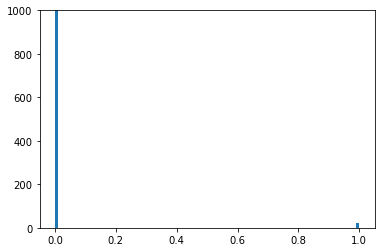

wrong_fragment 
 0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
494016    0.0
494017    0.0
494018    0.0
494019    0.0
494020    0.0
Name: wrong_fragment, Length: 494021, dtype: float64


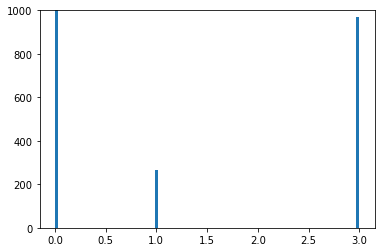

urgent 
 0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
494016    0.0
494017    0.0
494018    0.0
494019    0.0
494020    0.0
Name: urgent, Length: 494021, dtype: float64


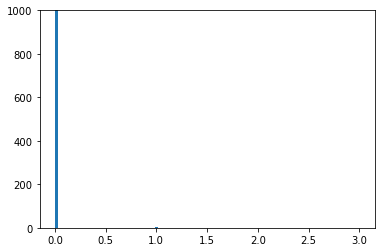

hot 
 0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
494016    0.0
494017    0.0
494018    0.0
494019    0.0
494020    0.0
Name: hot, Length: 494021, dtype: float64


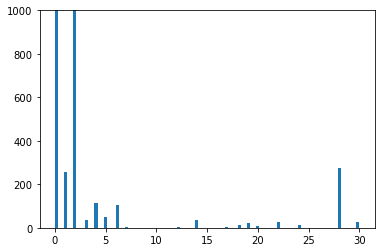

num_failed_logins 
 0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
494016    0.0
494017    0.0
494018    0.0
494019    0.0
494020    0.0
Name: num_failed_logins, Length: 494021, dtype: float64


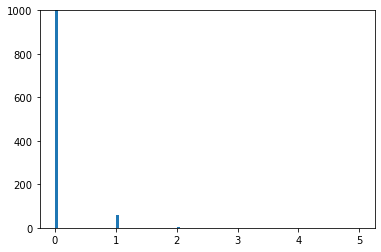

logged_in 
 0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
494016    1.0
494017    1.0
494018    1.0
494019    1.0
494020    1.0
Name: logged_in, Length: 494021, dtype: float64


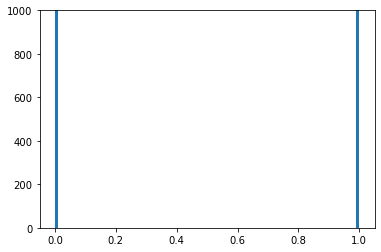

num_compromised 
 0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
494016    0.0
494017    0.0
494018    0.0
494019    0.0
494020    0.0
Name: num_compromised, Length: 494021, dtype: float64


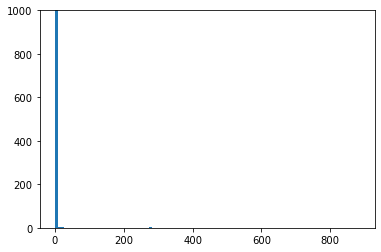

root_shell 
 0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
494016    0.0
494017    0.0
494018    0.0
494019    0.0
494020    0.0
Name: root_shell, Length: 494021, dtype: float64


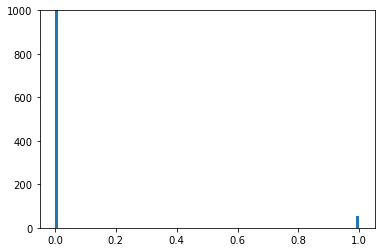

su_attempted 
 0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
494016    0.0
494017    0.0
494018    0.0
494019    0.0
494020    0.0
Name: su_attempted, Length: 494021, dtype: float64


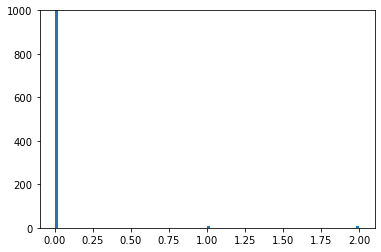

num_root 
 0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
494016    0.0
494017    0.0
494018    0.0
494019    0.0
494020    0.0
Name: num_root, Length: 494021, dtype: float64


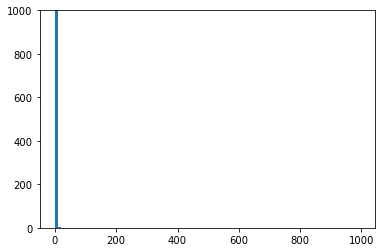

num_file_creations 
 0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
494016    0.0
494017    0.0
494018    0.0
494019    0.0
494020    0.0
Name: num_file_creations, Length: 494021, dtype: float64


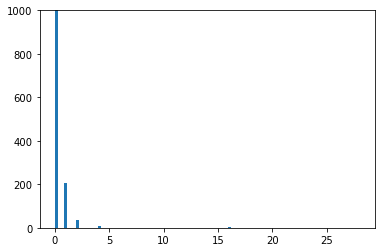

num_shells 
 0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
494016    0.0
494017    0.0
494018    0.0
494019    0.0
494020    0.0
Name: num_shells, Length: 494021, dtype: float64


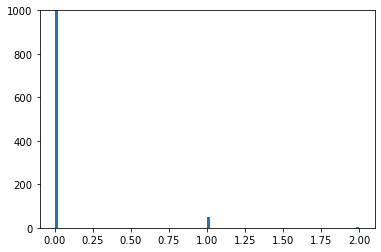

num_access_files 
 0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
494016    0.0
494017    0.0
494018    0.0
494019    0.0
494020    0.0
Name: num_access_files, Length: 494021, dtype: float64


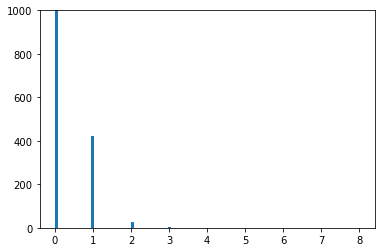

num_outbound_cmds 
 0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
494016    0.0
494017    0.0
494018    0.0
494019    0.0
494020    0.0
Name: num_outbound_cmds, Length: 494021, dtype: float64


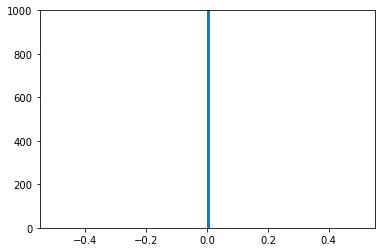

is_host_login 
 0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
494016    0.0
494017    0.0
494018    0.0
494019    0.0
494020    0.0
Name: is_host_login, Length: 494021, dtype: float64


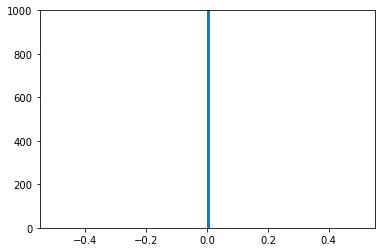

is_guest_login 
 0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
494016    0.0
494017    0.0
494018    0.0
494019    0.0
494020    0.0
Name: is_guest_login, Length: 494021, dtype: float64


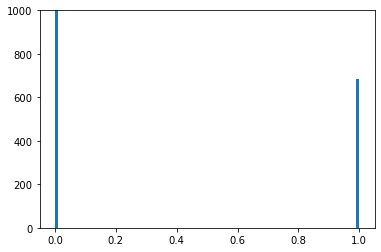

count 
 0         8.0
1         8.0
2         8.0
3         6.0
4         6.0
         ... 
494016    4.0
494017    6.0
494018    6.0
494019    6.0
494020    6.0
Name: count, Length: 494021, dtype: float64


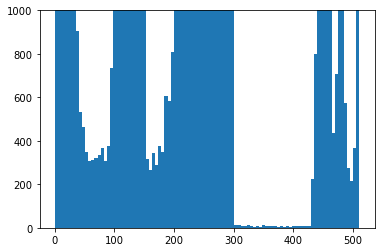

srv_count 
 0          8.0
1          8.0
2          8.0
3          6.0
4          6.0
          ... 
494016     5.0
494017     6.0
494018    18.0
494019    12.0
494020    35.0
Name: srv_count, Length: 494021, dtype: float64


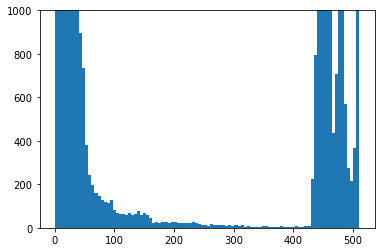

serror_rate 
 0         0.00
1         0.00
2         0.00
3         0.00
4         0.00
          ... 
494016    0.00
494017    0.00
494018    0.17
494019    0.00
494020    0.00
Name: serror_rate, Length: 494021, dtype: float64


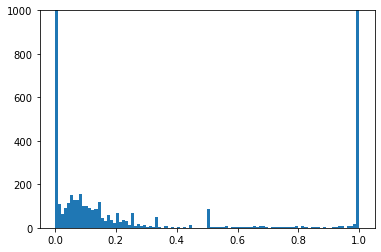

srv_serror_rate 
 0         0.00
1         0.00
2         0.00
3         0.00
4         0.00
          ... 
494016    0.00
494017    0.00
494018    0.11
494019    0.00
494020    0.00
Name: srv_serror_rate, Length: 494021, dtype: float64


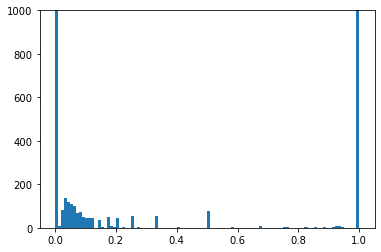

rerror_rate 
 0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
494016    0.0
494017    0.0
494018    0.0
494019    0.0
494020    0.0
Name: rerror_rate, Length: 494021, dtype: float64


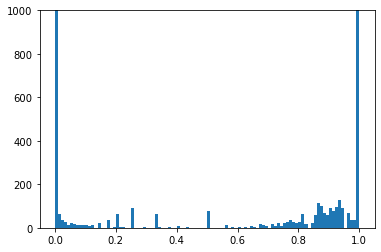

srv_rerror_rate 
 0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
494016    0.0
494017    0.0
494018    0.0
494019    0.0
494020    0.0
Name: srv_rerror_rate, Length: 494021, dtype: float64


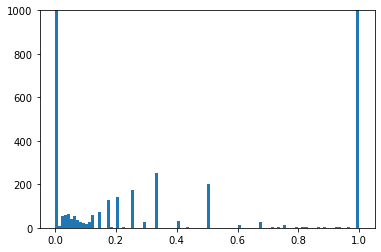

same_srv_rate 
 0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
494016    1.0
494017    1.0
494018    1.0
494019    1.0
494020    1.0
Name: same_srv_rate, Length: 494021, dtype: float64


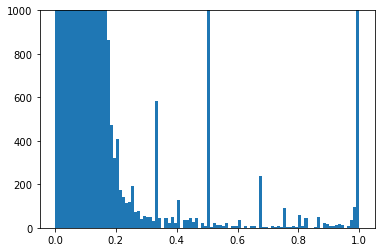

diff_srv_rate 
 0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
494016    0.0
494017    0.0
494018    0.0
494019    0.0
494020    0.0
Name: diff_srv_rate, Length: 494021, dtype: float64


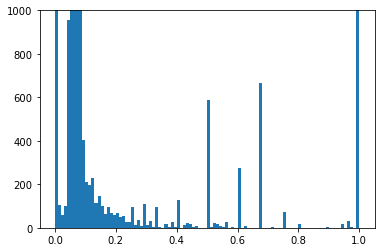

srv_diff_host_rate 
 0         0.00
1         0.00
2         0.00
3         0.00
4         0.00
          ... 
494016    0.40
494017    0.00
494018    0.17
494019    0.17
494020    0.14
Name: srv_diff_host_rate, Length: 494021, dtype: float64


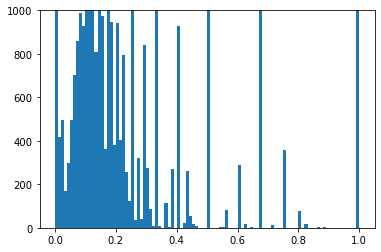

dst_host_count 
 0          9.0
1         19.0
2         29.0
3         39.0
4         49.0
          ... 
494016    86.0
494017     6.0
494018    16.0
494019    26.0
494020     6.0
Name: dst_host_count, Length: 494021, dtype: float64


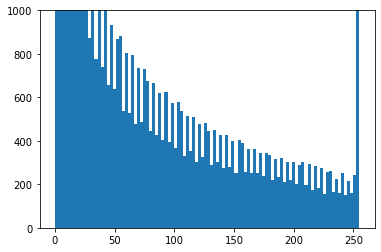

dst_host_srv_count 
 0           9.0
1          19.0
2          29.0
3          39.0
4          49.0
          ...  
494016    255.0
494017    255.0
494018    255.0
494019    255.0
494020    255.0
Name: dst_host_srv_count, Length: 494021, dtype: float64


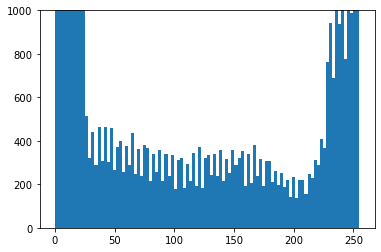

dst_host_same_srv_rate 
 0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
494016    1.0
494017    1.0
494018    1.0
494019    1.0
494020    1.0
Name: dst_host_same_srv_rate, Length: 494021, dtype: float64


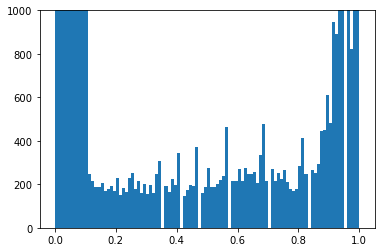

dst_host_diff_srv_rate 
 0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
494016    0.0
494017    0.0
494018    0.0
494019    0.0
494020    0.0
Name: dst_host_diff_srv_rate, Length: 494021, dtype: float64


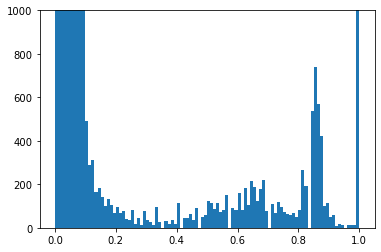

dst_host_same_src_port_rate 
 0         0.11
1         0.05
2         0.03
3         0.03
4         0.02
          ... 
494016    0.01
494017    0.17
494018    0.06
494019    0.04
494020    0.17
Name: dst_host_same_src_port_rate, Length: 494021, dtype: float64


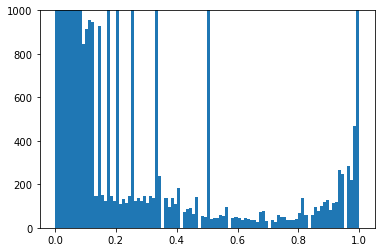

dst_host_srv_diff_host_rate 
 0         0.00
1         0.00
2         0.00
3         0.00
4         0.00
          ... 
494016    0.05
494017    0.05
494018    0.05
494019    0.05
494020    0.05
Name: dst_host_srv_diff_host_rate, Length: 494021, dtype: float64


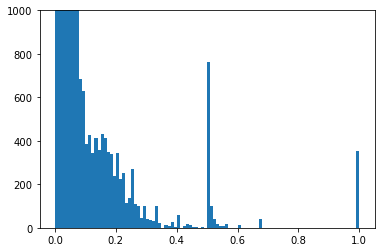

dst_host_serror_rate 
 0         0.00
1         0.00
2         0.00
3         0.00
4         0.00
          ... 
494016    0.00
494017    0.00
494018    0.06
494019    0.04
494020    0.00
Name: dst_host_serror_rate, Length: 494021, dtype: float64


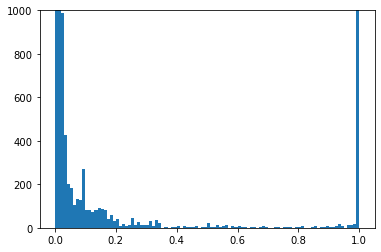

dst_host_srv_serror_rate 
 0         0.00
1         0.00
2         0.00
3         0.00
4         0.00
          ... 
494016    0.01
494017    0.01
494018    0.01
494019    0.01
494020    0.01
Name: dst_host_srv_serror_rate, Length: 494021, dtype: float64


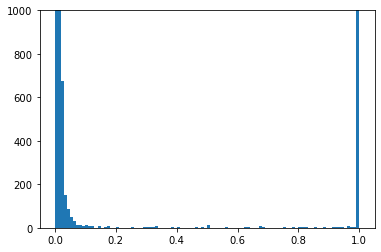

dst_host_rerror_rate 
 0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
494016    0.0
494017    0.0
494018    0.0
494019    0.0
494020    0.0
Name: dst_host_rerror_rate, Length: 494021, dtype: float64


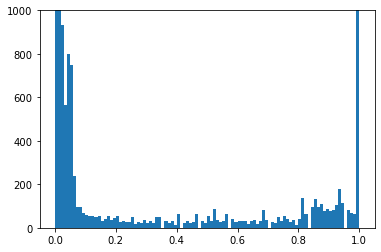

dst_host_srv_rerror_rate 
 0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
494016    0.0
494017    0.0
494018    0.0
494019    0.0
494020    0.0
Name: dst_host_srv_rerror_rate, Length: 494021, dtype: float64


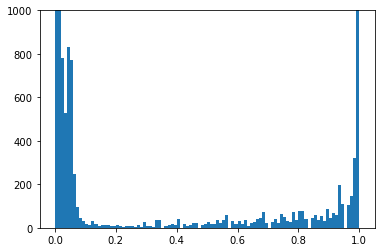

In [29]:
import matplotlib.pyplot as plt
for col in col_dense:
    print(col,'\n',df[col].astype("float64"))
    plt.hist(df[col].astype("float64"),bins=100)
    plt.ylim(0, 1000)
    plt.show()
    